In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import csv
from cvrptw import *
import os
import sys
import json

In [5]:
fname = "..\\..\\data\\VRPTW\\solomon_25\\C101.json"

tlim = 300

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')
# solution = model.solve(TimeLimit=tlim)

best_known_solution: 191.3


In [4]:
solution.get_solver_output()

AttributeError: 'CpoSolveResult' object has no attribute 'get_solver_output'

best_known_solution: 827.3
best_known_solution: 827.3
prdel
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 476 variables, 577 constraints
 ! TimeLimit            = 60
 ! LogPeriod            = 100000
 ! LogVerbosity         = Terse
 ! Initial process time : 0.07s (0.07s extraction + 0.00s propagation)
 !  . Log search space  : 2590.8 (before), 2590.8 (after)
 !  . Memory usage      : 9.5 MB (before), 9.5 MB (after)
 ! Using parallel search with 12 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        476                 -
 + New bound is 484.9999
                        0        366                 -
 + New bound is 538.7999
                        0        366    1            -
 + New bound is 553.1527
 *      2636.200      132  0.23s        1      (gap is 79.02%)
 I Used: 20
 *      2565.700     

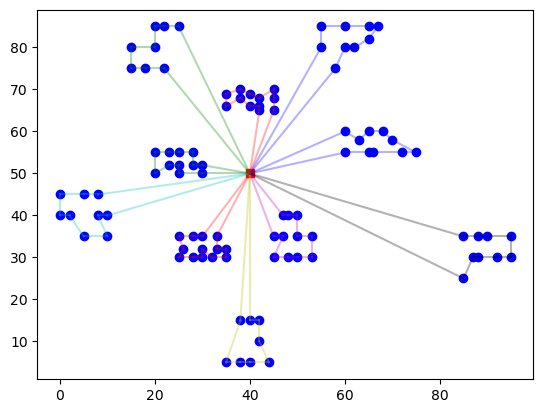

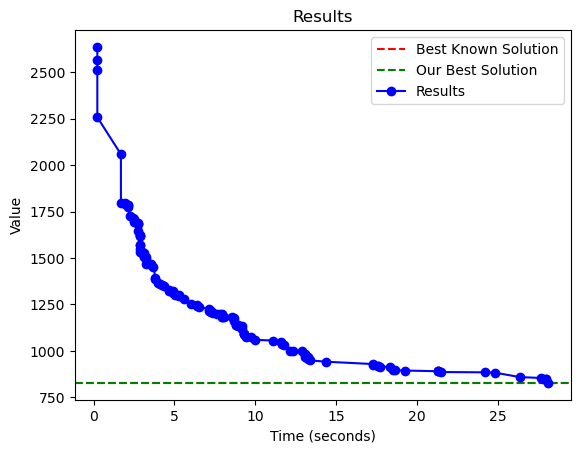

In [4]:
fname = "..\\..\\data\\VRPTW\\solomon_100\\C101.json"
tlim = 60

instance = Cvrptw()
instance.read_json(fname)

print('best_known_solution:', instance.instance['best_known_solution']['Distance'])
if instance.instance['best_known_solution'] is not None:
    print('best_known_solution:', instance.instance['best_known_solution']['Distance'])
    print('prdel')
else:
    print('best_known_solution: None')

instance.solve(tlim)
instance.visualize_solution()
instance.visualize_progress()

In [32]:
print('best_known_solution:', instance.instance['best_known_solution']['Distance'])

best_known_solution:     1261.8


In [34]:
print(instance.solution['search_progress'][-1])

[1490.8, 13.59]


In [35]:
instance.save_to_json()

In [43]:
def get_best_known_solution(instance_name, N):
    # Function to retrieve the best known solution based on instance name and N
    return optimal_values.get(instance_name + '.' + str(N), None)

# def convert_data_to_json():
data_folder = '..\\..\\data\\VRPTW\\'  # Specify the folder name where the data files are located
cvrptw_prob = CVRPTWProblem()

for folder_name in os.listdir(data_folder):
    if not os.path.isdir(os.path.join(data_folder, folder_name)):
        continue

    print(folder_name)

    # N = int(folder_name.split('_')[-1])  # Extract the value of N from the folder name
    # folder_path = os.path.join(data_folder, folder_name)
    #
    # for filename in os.listdir(folder_path):
    #     if not filename.endswith('.txt'):
    #         continue
    #
    #     instance_name = filename.split('.')[0]  # Extract the instance name from the file name
    #     instance_path = os.path.join(folder_path, filename)
    #     cvrptw_prob = CVRPTWProblem()
    #     cvrptw_prob.read(instance_path)
    #     instance_data = cvrptw_prob.to_dict()
    #
    #     # Create the JSON object
    #     json_obj = {
    #         'name': 'cvrptw',
    #         'N': N,
    #         'best_known_solution': get_best_known_solution(instance_name, N),
    #         'our_best_solution': '',
    #         'solutions': [],
    #         'data': instance_data,
    #     }
    #
    #     with open(os.path.join(folder_path, instance_name + '.json'), 'w') as json_file:
    #         json.dump(json_obj, json_file)
    #     break
    # break
# Save the JSON data to a file




# Call the function to convert the data to JSON
# convert_data_to_json()


solomon_100
solomon_25
solomon_50


In [8]:
# def load_optimal_values(json_data):
optimal_values_file = '..\\..\\data\\VRPTW\\optimals.csv'  # Specify the path to the CSV file
optimal_values = {}

with open(optimal_values_file, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=';')

    for row in csv_reader:
        instance_key = row.pop('Problem')  # Remove the instance key from the row
        optimal_values[instance_key] = row

# Call the function to load the optimal values and update the JSON data
# load_optimal_values(json_data)


In [38]:
import re

log = solution.solver_log

# Define the regex pattern
pattern = r"\*\s+(\d+\.\d+)\s+\w+\s+(\d+\.\d+s)"

# Find all matches of numbers and times in the log using the regex pattern
matches = re.findall(pattern, log, re.MULTILINE)

# Convert minutes and hours into seconds and store the results
result = [[float(match[0]), match[1]] for match in matches]
for i in range(len(result)):
    unit = result[i][1][-1]  # Get the last character of the time
    if unit not in ['s', 'm', 'h']:  # If the unit is not minutes or hours
        print("Error: Unknown unit", unit)
    time = float(result[i][1][:-1])  # Get the time without the last character
    if unit == 'm':  # If the unit is minutes
        result[i][1] = time * 60  # Convert minutes to seconds
    elif unit == 'h':  # If the unit is hours
        result[i][1] = time * 3600  # Convert hours to seconds
    else:
        result[i][1] = time  # Otherwise, the unit is seconds


In [37]:
print(log)

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 476 variables, 577 constraints
 ! TimeLimit            = 300
 ! Workers              = 2
 ! LogPeriod            = 100000
 ! LogVerbosity         = Terse
 ! Initial process time : 0.07s (0.07s extraction + 0.00s propagation)
 !  . Log search space  : 2869.6 (before), 2869.6 (after)
 !  . Memory usage      : 9.5 MB (before), 9.5 MB (after)
 ! Using parallel search with 2 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        476                 -
 + New bound is 418.4999
                        0        376                 -
 + New bound is 568.3999
                        0        376    1            -
 + New bound is 600.3805
 *      3833.900      102  0.15s        1      (gap is 84.34%)
 I Used: 15
 *      3588.000      100  0.15s        2      (gap i

In [39]:
print(result[-1])

[1287.9, 229.58]


In [40]:
import matplotlib.pyplot as plt

# Assume the result variable contains the processed results

# Extract the number and time values into separate lists
numbers = [entry[0] for entry in result]
times = [entry[1] for entry in result]

best_known_solution = float(instance['best_known_solution']['Distance'])

# Plot the data
plt.plot(times, numbers, 'bo-', label='Results')
plt.axhline(y=best_known_solution, color='r', linestyle='--', label='Best Known Solution')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')
plt.title('Results')
plt.legend()

# plt.ylim(min(times), max(times + [best_known_solution]))

# Display the plot
plt.show()


TypeError: 'Cvrptw' object is not subscriptable

24
802.2


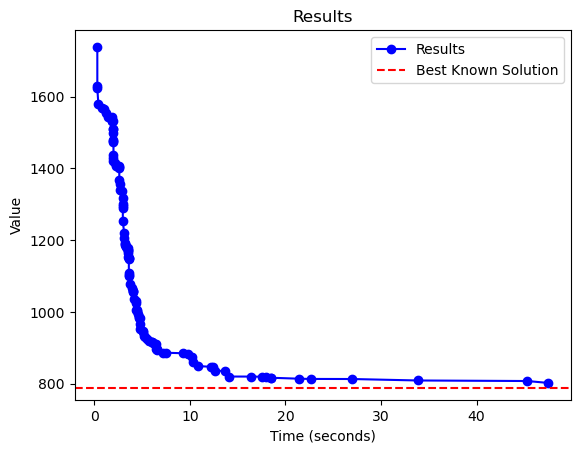

In [52]:
fname = "R109-24.json"
tlim = 60*1

instance = Cvrptw()
instance.read_json(fname)
print(instance.instance['our_best_solution']['n_workers'])
print(instance.instance['our_best_solution']['total_distance'])
instance.visualize_progress(instance.instance['our_best_solution'])

56
805.1


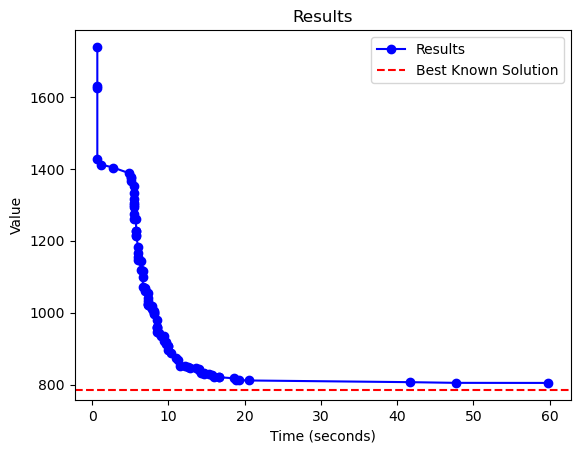

In [53]:
fname = "R109-56.json"
tlim = 60 * 1

instance = Cvrptw()
instance.read_json(fname)
print(instance.instance['our_best_solution']['n_workers'])
print(instance.instance['our_best_solution']['total_distance'])
instance.visualize_progress(instance.instance['our_best_solution'])

1
808.7


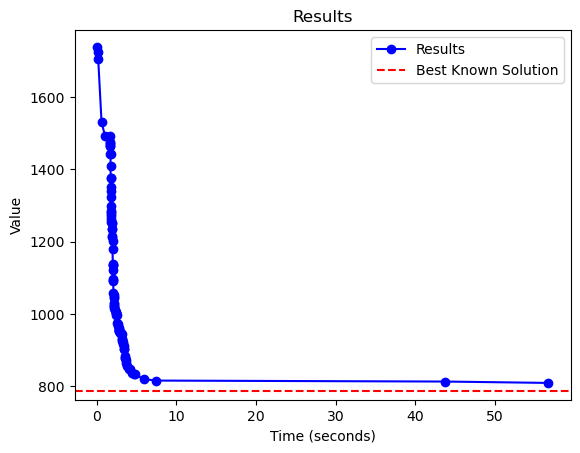

In [54]:
fname = "R109-1-1.json"
tlim = 60*1

instance = Cvrptw()
instance.read_json(fname)
print(instance.instance['our_best_solution']['n_workers'])
print(instance.instance['our_best_solution']['total_distance'])
instance.visualize_progress(instance.instance['our_best_solution'])

56
1020.9


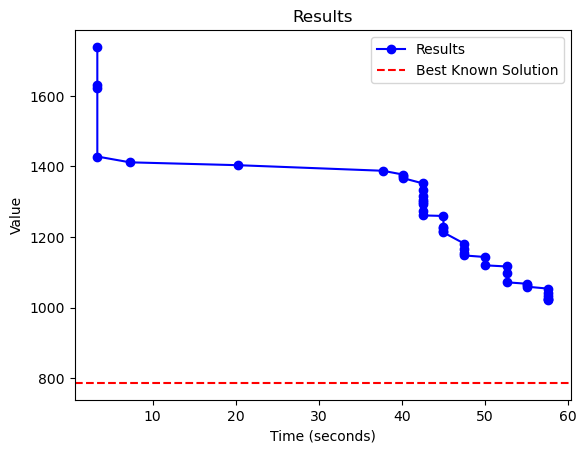

In [55]:
fname = "R109-1-56.json"
tlim = 60*1

instance = Cvrptw()
instance.read_json(fname)
print(instance.instance['our_best_solution']['n_workers'])
print(instance.instance['our_best_solution']['total_distance'])
instance.visualize_progress(instance.instance['our_best_solution'])


24
802.2


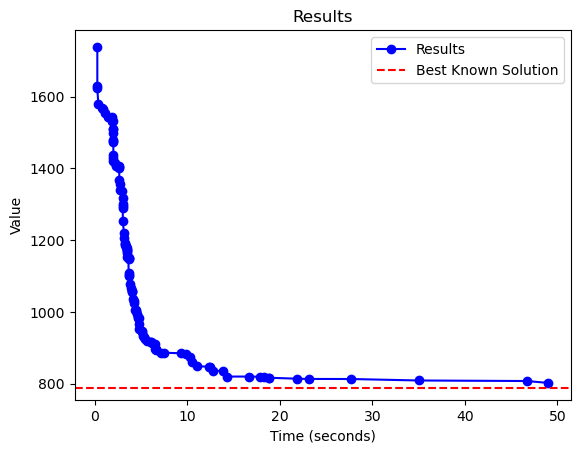

In [57]:
fname = "R109-24-24.json"
tlim = 60*1

instance = Cvrptw()
instance.read_json(fname)
print(instance.instance['our_best_solution']['n_workers'])
print(instance.instance['our_best_solution']['total_distance'])
instance.visualize_progress(instance.instance['our_best_solution'])


In [2]:


fname = "..\\..\\data\\VRPTW\\solomon_25\\C101.json"

tlim = 15

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])


best_known_solution: 191.3


In [8]:
data_folder = '..\\..\\data\\VRPTW'

for folder_name in os.listdir(data_folder):
    if not os.path.isdir(os.path.join(data_folder, folder_name)):
        continue
    N = int(folder_name.split('_')[-1])  # Extract the value of N from the folder name
    folder_path = os.path.join(data_folder, folder_name)
    print('folder_name:', folder_name)
    for filename in os.listdir(folder_path):
        if not filename.endswith('.json'):
            continue
        instance_name = filename.split('.')[0]  # Extract the instance name from the file name
        instance_path = os.path.join(folder_path, filename)

        tlim = 60*1  # 15 minutes

        print('instance_name:', instance_name)

        instance = Cvrptw()
        instance.read_json(instance_path)

        if instance.instance['best_known_solution'] is not None:
            print('best_known_solution:', instance.instance['best_known_solution']['Distance'])
        else:
            print('best_known_solution: None')

        if instance.instance['our_best_solution'] is not None:
            print('our_best_solution:', instance.instance['our_best_solution']['Distance'])
        else:
            print('our_best_solution: None')


folder_name: solomon_100
instance_name: C101
instance_name: C102
instance_name: C103
instance_name: C104
instance_name: C105
instance_name: C106
instance_name: C107
instance_name: C108
instance_name: C109
instance_name: C201
instance_name: C202
instance_name: C203
instance_name: C204
instance_name: C205
instance_name: C206
instance_name: C207
instance_name: C208
instance_name: R101
instance_name: R102
instance_name: R103
instance_name: R104
instance_name: R105
instance_name: R106
instance_name: R107
instance_name: R108
instance_name: R109
instance_name: R110
instance_name: R111
instance_name: R112
instance_name: R201
instance_name: R202
instance_name: R203
instance_name: R204
instance_name: R205
instance_name: R206
instance_name: R207
instance_name: R208
instance_name: R209
instance_name: R210
instance_name: R211
instance_name: RC101
instance_name: RC102
instance_name: RC103
instance_name: RC104
instance_name: RC105
instance_name: RC106
instance_name: RC107
instance_name: RC108
instanc